# Data Agumentation Problem
#### Here you need to compare two models with and without agumentation to see the difference

### Import libraries

In [ ]:
import glob
import cv2
import numpy as np
import random

### Read Images

In [ ]:
# First we should read all the images from the provided directory,
# 1. first unzip the .zip file attached with homeworks
# 2. read images from directory
# 3. create labels array

!unzip data_aug-20221101T192103Z-001.zip

########################
## PUT YOUR CODE HERE ##
########################
height, width = 28, 28
data_num = 100
X = np.zeros((data_num, height, width, 3)).astype(np.uint8)
y = np.zeros((data_num,)).astype(np.uint8)

for i, path in enumerate(glob.glob('data_aug/*')):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X[i] = cv2.resize(img, (height, width))
    if path.startswith('data_aug/cat'):
        y[i] = 0
    else:
        y[i] = 1

### Prepare Dataset

In [ ]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)

########################
## PUT YOUR CODE HERE ##
########################
X = X / 255

In [ ]:
# Resize your images to (28 * 28)


########################
## PUT YOUR CODE HERE ##
########################

# I did this when I read the data

In [ ]:
# Flatten your dataset images 


########################
## PUT YOUR CODE HERE ##
########################
X = X.reshape((100, 28 * 28 * 3))
y = y.reshape((100, 1))

In [ ]:
# Check your dataset and labels to be a numpy ndarray of sizes (100, 28 * 28 * 3) and (100, 1) respectively.


########################
## PUT YOUR CODE HERE ##
########################
assert X.shape == (100, 28 * 28 * 3)
assert y.shape == (100, 1)

### Create your Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem



########################
## PUT YOUR CODE HERE ##
########################
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=X[0].shape))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               301184    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 309,505
Trainable params: 309,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split


########################
## PUT YOUR CODE HERE ##
########################
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# # Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

########################
## PUT YOUR CODE HERE ##
#
# uncomment below and complete the code
# history = 
########################

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=20,
                    validation_data=(X_test, y_test))


Epoch 1/20
67/67 [==============================] - 1s 6ms/step - loss: 0.9642 - accuracy: 0.4776 - val_loss: 0.7353 - val_accuracy: 0.4242
Epoch 2/20
67/67 [==============================] - 0s 4ms/step - loss: 0.7657 - accuracy: 0.4478 - val_loss: 0.7044 - val_accuracy: 0.5455
Epoch 3/20
67/67 [==============================] - 0s 4ms/step - loss: 0.6589 - accuracy: 0.6567 - val_loss: 0.7918 - val_accuracy: 0.4242
Epoch 4/20
67/67 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.5672 - val_loss: 0.8496 - val_accuracy: 0.4242
Epoch 5/20
67/67 [==============================] - 0s 3ms/step - loss: 0.5923 - accuracy: 0.7015 - val_loss: 0.9426 - val_accuracy: 0.3636
Epoch 6/20
67/67 [==============================] - 0s 3ms/step - loss: 0.6218 - accuracy: 0.6716 - val_loss: 1.2010 - val_accuracy: 0.4545
Epoch 7/20
67/67 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.6119 - val_loss: 0.8068 - val_accuracy: 0.3939
Epoch 8/20
67/67 [==

### Plot results

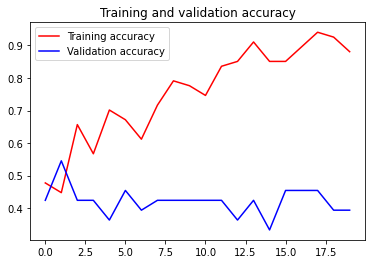

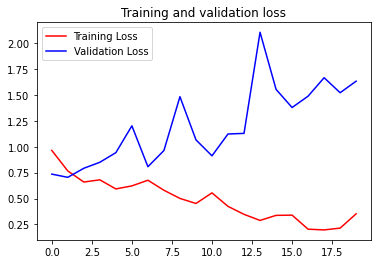

In [ ]:
# Plot your data

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate results

In [ ]:
# Evaluate your model on the test data


########################
## PUT YOUR CODE HERE ##
########################
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 11ms/step - loss: 1.6322 - accuracy: 0.3939


[1.632162094116211, 0.39393940567970276]

# Compare results with and without using agumentation
### Now we need to do agumentation to create more images to help us overcome underfitting

### Agumentation Methods
Here you should do the agumentation methods to produce more images


In [ ]:
# In this cell you need to implement agumentation methods to increase our data
# NOTICE! Only use libraries in CV2 or others, DON'T use KERAS and Pytorch!


def fill(img, h, w):
    ''' 
    we use this function to resize the shifted image and fill border pixles with different methods
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          h: an integer defining the height of target image
          w: an integer defining the width of target image
    
    output: resized and interpolated image 

    '''
        
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img


def horizontal_shift(img, ratio=0.5):

    ''' 
    we use this function to shift the image horizontally with the given ratio
    width_target = width_input - ratio * width_input
    
    Hint: select ratio in range (-ratio to ratio) uniformly, to simulate horizontally shift to right and left with different ratios


    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          ratio: a float number between 0 and 1
    
    output: resized and interpolated image 

    '''
    
    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio) # you can change this
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]

    img = fill(img, h, w) # fill image borders

    return img


In [ ]:
    
def vertical_shift(img, ratio=0.5):

    ''' 
    we use this function to shift the image vertically with the given ratio
    width_target = width_input - ratio * width_input
    
    Hint: select ratio in range (-ratio to ratio) uniformly, to simulate vertically shift to up and down with different ratios


    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          ratio: a float number between 0 and 1
    
    output: resized and interpolated image 

    '''

    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = h*ratio
    if ratio > 0:
        img = img[:int(h-to_shift), :, :]
    if ratio < 0:
        img = img[int(-1*to_shift):, :, :]
        
    img = fill(img, h, w)

    return img



In [ ]:
def brightness(img, low, high):

    ''' 
    we use this function to change the brightness of the image with given high and low values
    
    Hint: first convert to HSV color domain, Next make your image brighter or darker then convert back to BGR

    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          low:
          high:
    
    output: image with different brightness

    '''

    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    return img

In [ ]:

def zoom(img, value):

    ''' 
    we use this function to zoom the image with given value
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          value: an integer number indicating the zoom effect
    
    output: zoomed image

    '''
    
    if value > 1 or value < 0:
        print('Value for zoom should be less than 1 and greater than 0')
        return img
    value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
    
    img = fill(img, h, w)

    return img

In [ ]:
def channel_shift(img, value):

    ''' 
    we use this function to shift color channels to play with colors in the image
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          value: an integer number indicating the color change effect
    
    output: image with changed colors

    '''
    
    value = int(random.uniform(-value, value))
    img = img + value
    img[:,:,:][img[:,:,:]>255]  = 255
    img[:,:,:][img[:,:,:]<0]  = 0
    img = img.astype(np.uint8)
    
    return img

In [ ]:
def horizontal_flip(img):

    ''' 
    we use this function to flip the image horizontally

    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
    
    output: horizontally fliped image

    '''

    return cv2.flip(img, 1)


In [ ]:
def vertical_flip(img):

    ''' 
    we use this function to flip the image vertically
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
    
    output: vertically fliped image

    '''
    
    return cv2.flip(img, 0)


### Prepare your dataset

In [ ]:
# For each image in our dataset run the previous methods and create a new dataset

    ########################
    ## PUT YOUR CODE HERE ##
    ########################
data_num = 100 * 8
X = np.zeros((data_num, height, width, 3)).astype(np.uint8)
y = np.zeros((data_num,)).astype(np.uint8)

for path in glob.glob('data_aug/*'):
    img = cv2.imread(path)
    augmented_data = []
    augmented_data.append(horizontal_shift(img))
    augmented_data.append(vertical_shift(img))
    augmented_data.append(brightness(img, 0, 10))
    augmented_data.append(zoom(img, 0.5))
    augmented_data.append(channel_shift(img, 20))
    augmented_data.append(horizontal_flip(img))
    augmented_data.append(vertical_flip(img))
    for i, im in enumerate(augmented_data):
        cv2.imwrite(f"data_aug/{i}{path.split('/')[1]}", im)

for i, path in enumerate(glob.glob('data_aug/*')):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X[i] = cv2.resize(img, (height, width))
    if 'cat' in path:
        y[i] = 0
    else:
        y[i] = 1

In [ ]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)

########################
## PUT YOUR CODE HERE ##
########################

X = X/255

In [ ]:
# Resize your images to (28 * 28)


########################
## PUT YOUR CODE HERE ##
########################

# already done

In [ ]:
# Flatten your dataset images 


########################
## PUT YOUR CODE HERE ##
########################
X = X.reshape((800, 28 * 28 * 3))
y = y.reshape((800, 1))

In [ ]:
# Check your dataset and labels to be a numpy ndarray of sizes (800, 28 * 28 * 3) and (800, 1) respectively.


########################
## PUT YOUR CODE HERE ##
########################
assert X.shape == (800, 28 * 28 * 3)
assert y.shape == (800, 1)

### Create your model

In [ ]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem



########################
## PUT YOUR CODE HERE ##
########################

model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=X[0].shape))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               301184    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 309,505
Trainable params: 309,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Split your dataset to test and train with the desired implementation
# use sklearn.model_selection.train_test_split


########################
## PUT YOUR CODE HERE ##
########################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Compile your model to introduce loss function optimizer and metrices to monitor accuracy metric and train on the data
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

########################
## PUT YOUR CODE HERE ##
#
# uncomment below and complete the code
# history = 
########################

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model2.fit(X_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(X_test, y_test))



Epoch 1/20
17/17 [==============================] - 1s 15ms/step - loss: 73.7328 - accuracy: 0.5131 - val_loss: 19.3535 - val_accuracy: 0.4962
Epoch 2/20
17/17 [==============================] - 0s 7ms/step - loss: 11.6012 - accuracy: 0.5765 - val_loss: 10.7381 - val_accuracy: 0.5227
Epoch 3/20
17/17 [==============================] - 0s 7ms/step - loss: 9.0261 - accuracy: 0.5728 - val_loss: 9.6151 - val_accuracy: 0.5492
Epoch 4/20
17/17 [==============================] - 0s 6ms/step - loss: 7.6808 - accuracy: 0.5951 - val_loss: 15.2763 - val_accuracy: 0.5341
Epoch 5/20
17/17 [==============================] - 0s 6ms/step - loss: 5.9873 - accuracy: 0.6157 - val_loss: 13.9462 - val_accuracy: 0.5000
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 6.1274 - accuracy: 0.6175 - val_loss: 3.6410 - val_accuracy: 0.6515
Epoch 7/20
17/17 [==============================] - 0s 6ms/step - loss: 3.0182 - accuracy: 0.6716 - val_loss: 3.5675 - val_accuracy: 0.6364
Epoch 8/20
17

### Plot your results

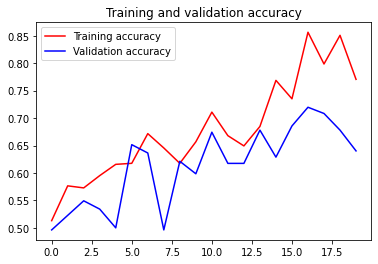

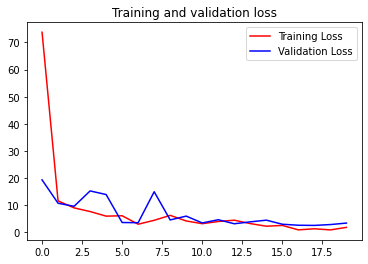

In [ ]:
# Plot your data

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate results

In [ ]:
# Evaluate your model on the test data


########################
## PUT YOUR CODE HERE ##
########################
model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3.4295 - accuracy: 0.6402


[3.4295058250427246, 0.6401515007019043]

# Compare your results with and without using agumentation to see the difference

## Optional Bonus Activity

In [ ]:
# Optional

# Keras data Augmentation

#use the bellow links

# https://keras.io/guides/keras_cv/custom_image_augmentations/

# https://keras.io/api/preprocessing/image/
